Evaluation criteria:

1) Data Understanding & Preparation

2) Model Data: The model you should be using must be, imperatively, a deep learning model (based on neural networks)

3) Code Functionality and Readability: The code has an easy-to-follow logical structure. The notebook uses comments effectively and Notebook Markdown cells correctly. The steps of the data science process (gather, assess, clean, analyze, model, visualize) are identified with comments or Markdown cells, as well. All the project codes should be gathered in a unique Jupyter notebook and demonstrates the successful execution.

4) Github Repository: You must have a Github repository of the project. The repository must have a README.md file that lists the libraries used, and a summary of the results of the analysis.

## Basic exploration of provided data and creation of recurent neural network model with tensorflow ==> base line solution for LSTM



---
# First Step: Data Understanding and Preparation


---




# **Import** Libraries

In [1]:
!pip install tensorflow==2.0.0
!pip install chart_studio

import numpy as np 
import pandas as pd
import os

import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

import math
import random

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 39.0MB/s 
     |████████████████████████████████| 450kB 55.7MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

# Preprocessing

## Reading datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%%time
train_df = pd.read_csv('/content/drive/My Drive/DL/train.csv')
weather_train_df = pd.read_csv('/content/drive/My Drive/DL/weather_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/DL/test.csv')
weather_test_df = pd.read_csv('/content/drive/My Drive/DL/weather_test.csv')
building_meta_df = pd.read_csv('/content/drive/My Drive/DL/building_metadata.csv')

CPU times: user 24.5 s, sys: 5.71 s, total: 30.2 s
Wall time: 44.5 s


In [4]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [6]:
test_df.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [7]:
weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [8]:
building_meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


## Bulding data

In [0]:
def plot_bar(data, name):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    data_label = data[name].value_counts()
    dict_train = dict(zip(data_label.keys(), ((data_label.sort_index())).tolist()))
    names = list(dict_train.keys())
    values = list(dict_train.values())
    plt.bar(names, values)
    ax.set_xticklabels(names, rotation=45)
    plt.grid()
    plt.show()

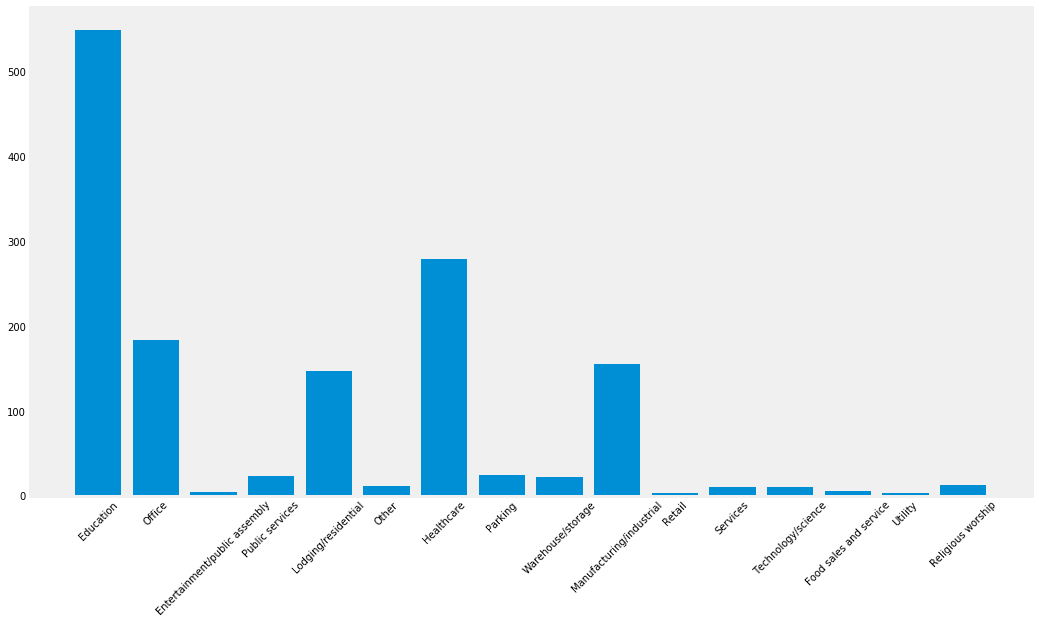

In [10]:
plot_bar(building_meta_df, 'primary_use')

## Merge data

In [0]:
train_df = train_df.merge(building_meta_df, on="building_id")

In [0]:
train_df = train_df.merge(weather_train_df, on=["site_id", "timestamp"])

In [13]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


## Sample rows from combined dataframe

In [14]:
sample_df = train_df.sample(20, random_state=0)
sample_df

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
2217631,255,3,2016-03-26 07:00:00,8.7921,2,Education,49078,1914.0,NaN,21.7,4.0,-6.7,0.0,1004.8,280.0,1.5
14843430,1209,0,2016-08-13 19:00:00,236.1380,13,Healthcare,115788,NaN,NaN,25.6,NaN,15.6,0.0,1012.9,320.0,5.7
17098627,1250,0,2016-06-27 17:00:00,664.5210,14,Education,232139,NaN,NaN,27.8,0.0,13.9,0.0,1016.9,190.0,3.6
10198113,888,2,2016-03-16 07:00:00,314.1500,9,Entertainment/public assembly,137522,NaN,NaN,19.4,0.0,6.1,0.0,1013.4,NaN,1.5
15314118,1102,2,2016-10-16 08:00:00,2609.3800,13,Office,87187,NaN,NaN,8.3,2.0,6.7,0.0,1011.6,0.0,0.0
15639128,1119,0,2016-11-29 04:00:00,52.0000,13,Office,119509,NaN,NaN,3.9,4.0,-0.6,0.0,982.4,230.0,2.6
8677154,765,0,2016-12-08 09:00:00,155.3670,6,Entertainment/public assembly,58562,NaN,NaN,2.2,NaN,0.0,0.0,1016.4,0.0,0.0
13837181,1150,1,2016-03-30 23:00:00,0.0000,13,Office,196043,NaN,NaN,7.8,NaN,4.4,0.0,1002.1,20.0,5.1
3671275,246,0,2016-10-22 10:00:00,351.8000,2,Office,202435,1967.0,NaN,25.0,0.0,5.6,0.0,1009.2,110.0,2.6
17242887,1244,0,2016-07-18 19:00:00,113.6400,14,Public services,95526,NaN,NaN,33.3,0.0,17.8,0.0,1015.7,250.0,5.1


In [15]:
sample_df.shape,test_df.shape

((20, 16), (41697600, 4))

In [16]:
sample_df.dtypes

building_id             int64
meter                   int64
timestamp              object
meter_reading         float64
site_id                 int64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

## Change the 'primary_use' column to categorical

In [17]:
train_df['primary_use'] = pd.Categorical(train_df['primary_use'])
train_df['primary_use'] = train_df['primary_use'].cat.codes
train_df.head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,0,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,0,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,0,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,0,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,0,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,5,0,2016-01-01 00:00:00,0.0,0,0,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,6,0,2016-01-01 00:00:00,0.0,0,4,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,7,0,2016-01-01 00:00:00,0.0,0,0,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,8,0,2016-01-01 00:00:00,0.0,0,0,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,9,0,2016-01-01 00:00:00,0.0,0,6,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


## Check how many 'NaN' values has each column

In [18]:
train_df.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12113306
floor_count           16630052
air_temperature           6163
cloud_coverage         8734870
dew_temperature           9645
precip_depth_1_hr      3658528
sea_level_pressure     1141174
wind_direction         1358553
wind_speed               53181
dtype: int64

In [19]:
100 * train_df.isnull().sum() / len(train_df)

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            60.188531
floor_count           82.631315
air_temperature        0.030623
cloud_coverage        43.401776
dew_temperature        0.047924
precip_depth_1_hr     18.178475
sea_level_pressure     5.670259
wind_direction         6.750371
wind_speed             0.264245
dtype: float64

## A lot of NaN's in some of columns ==> change them into numerical values or drop them in order to use this data in neural network

In [0]:
del train_df['floor_count']
del train_df['year_built']

In [21]:
train_df.describe()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.012560e+07,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.972116e+02,6.617305e-01,2.124813e+03,7.967773e+00,3.159801e+00,1.077848e+05,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.263729e+02,9.310748e-01,1.535796e+05,5.092223e+00,3.451352e+00,1.171616e+05,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.910000e+02,0.000000e+00,1.830000e+01,3.000000e+00,0.000000e+00,3.252700e+04,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.940000e+02,0.000000e+00,7.875000e+01,9.000000e+00,1.000000e+00,7.270900e+04,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.176000e+03,1.000000e+00,2.678430e+02,1.300000e+01,6.000000e+00,1.391130e+05,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,1.500000e+01,8.750000e+05,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


## Explore about "meter_reading"

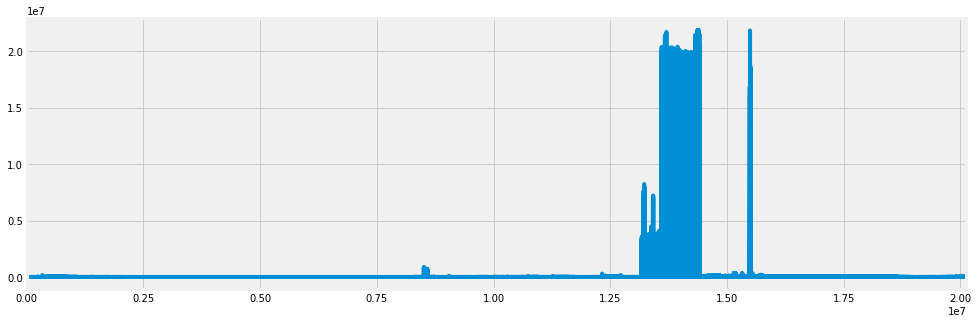

In [22]:
plt.figure(figsize = (15,5))
train_df['meter_reading'].plot()

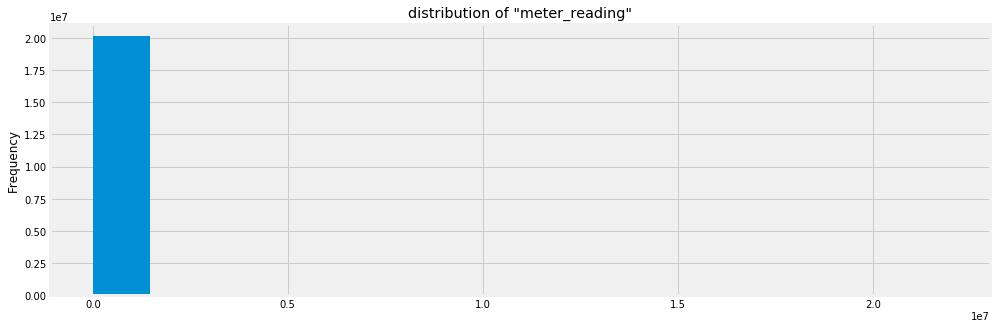

In [23]:
train_df['meter_reading'].plot(kind='hist',
                              bins=15,
                              figsize=(15,5),
                              title='distribution of "meter_reading"')

In [0]:
# sort data by "timestamp"
train_df = train_df.sort_values(by="timestamp" , ascending=True) 

## Correlation of other vaiables and meter_reading

In [25]:
correlation = train_df.corr()
correlation['meter_reading'].sort_values()

primary_use          -0.009962
sea_level_pressure   -0.004220
air_temperature      -0.004132
dew_temperature      -0.003330
wind_direction       -0.000078
precip_depth_1_hr     0.000509
cloud_coverage        0.006024
wind_speed            0.006071
building_id           0.008848
site_id               0.011996
meter                 0.017710
square_feet           0.024347
meter_reading         1.000000
Name: meter_reading, dtype: float64

In [26]:
correlation

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
building_id,1.000000,0.222599,0.008848,0.980872,0.058739,0.088990,-0.314149,-0.203832,-0.110091,0.022868,0.075239,0.049795,0.003683
meter,0.222599,1.000000,0.017710,0.254355,-0.081780,0.132866,-0.011159,-0.177186,-0.080445,-0.002283,-0.052700,-0.022276,-0.081169
meter_reading,0.008848,0.017710,1.000000,0.011996,-0.009962,0.024347,-0.004132,0.006024,-0.003330,0.000509,-0.004220,-0.000078,0.006071
site_id,0.980872,0.254355,0.011996,1.000000,0.077539,0.092335,-0.307199,-0.179160,-0.135186,0.022575,0.054179,0.050822,0.011564
primary_use,0.058739,-0.081780,-0.009962,0.077539,1.000000,-0.086189,-0.043461,0.100222,-0.013648,0.004844,0.033707,0.018611,0.052414
square_feet,0.088990,0.132866,0.024347,0.092335,-0.086189,1.000000,-0.015665,-0.041162,-0.023385,0.002437,-0.020698,-0.010900,-0.034896
air_temperature,-0.314149,-0.011159,-0.004132,-0.307199,-0.043461,-0.015665,1.000000,0.045196,0.750640,-0.004254,-0.315773,-0.093416,-0.081765
cloud_coverage,-0.203832,-0.177186,0.006024,-0.179160,0.100222,-0.041162,0.045196,1.000000,0.132972,0.118936,-0.148623,0.039997,0.244121
dew_temperature,-0.110091,-0.080445,-0.003330,-0.135186,-0.013648,-0.023385,0.750640,0.132972,1.000000,0.070819,-0.220753,-0.170000,-0.141874
precip_depth_1_hr,0.022868,-0.002283,0.000509,0.022575,0.004844,0.002437,-0.004254,0.118936,0.070819,1.000000,-0.061440,-0.009574,0.035093


In [0]:
import seaborn as sns

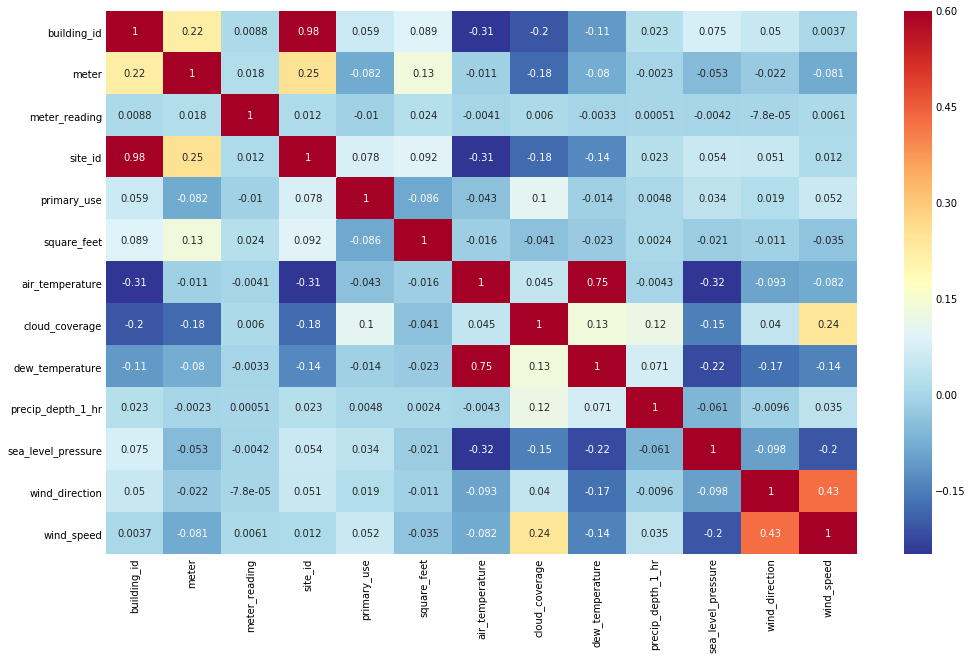

In [28]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation,cmap=plt.cm.RdYlBu_r,vmin=-0.25,
            annot=True,vmax=0.6)

In [29]:
# building_id
print('the number of building_id:{}'.format(train_df.building_id.nunique()))

the number of building_id:1449


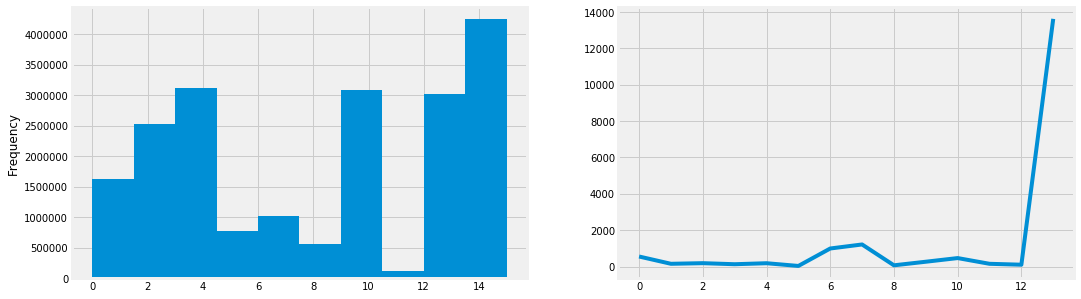

In [30]:
# site_id
plt.subplot(1,2,1)
train_df['site_id'].plot(kind='hist',figsize=(16,5))
ave = []
for i in range(14):
    ave.append(train_df.loc[(train_df.site_id==i)].meter_reading.mean())
plt.subplot(1,2,2)
plt.plot(ave)



---
# Second Step: Data Modeling (DL)


---



---





#Shaping data

In order to run LSTM neural network data has to be in three dimentional shape where axis corresponds to following data:
* x-axis time steps
* y-axis data examples
* z-axis features for single point in time

## Take data for first 10 building_id's and preprocess them for LSTM neural network

In [31]:
def extract_data(building_id):
    return train_df[train_df['building_id'] == building_id]

extracted_df = {}
for i in range(10):
    df = extract_data(i)
    sea_lev_pressure_mean = df['sea_level_pressure'].mean()
    dew_temperature_mean = df['dew_temperature'].mean()
    air_temperature_mean = df['air_temperature'].mean()
    precip_depth_1_hr_mean = df['precip_depth_1_hr'].mean()
    wind_speed_mean = df['wind_speed'].median()

    df['meter'] = pd.to_numeric(df['meter'], errors='coerce').fillna(0).astype(np.float32)
    df['meter_reading'] = pd.to_numeric(df['meter_reading'], errors='coerce').fillna(0).astype(np.float32)
    df['site_id'] = pd.to_numeric(df['site_id'], errors='coerce').fillna(0).astype(np.float32)
    df['primary_use'] = pd.to_numeric(df['primary_use'], errors='coerce').fillna(0).astype(np.float32)
    df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce').fillna(0).astype(np.float32)
    
    df['air_temperature'] = df['air_temperature'].fillna(-1)
    df['cloud_coverage'] = df['cloud_coverage'].fillna(-1)
    df['sea_level_pressure'] = df['sea_level_pressure'].fillna(sea_lev_pressure_mean)
    df['dew_temperature'] = df['dew_temperature'].fillna(dew_temperature_mean)
    df['air_temperature'] = df['air_temperature'].fillna(air_temperature_mean)
    df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(precip_depth_1_hr_mean)
    df['wind_direction'] = df['wind_direction'].apply(lambda x: random.random() * 360.0 if (math.isnan(x)) else x)
    df['wind_speed'] = df['wind_speed'].fillna(wind_speed_mean).astype(np.float32)
    extracted_df[i] = df
    
extracted_df[4]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4,4,0.0,2016-01-01 00:00:00,0.000000,0.0,0.0,116607.0,25.0,6.0,20.0,1.382557,1019.7,0.0,0.0
107,4,0.0,2016-01-01 01:00:00,0.000000,0.0,0.0,116607.0,24.4,-1.0,21.1,-1.000000,1020.2,70.0,1.5
210,4,0.0,2016-01-01 02:00:00,0.000000,0.0,0.0,116607.0,22.8,2.0,21.1,0.000000,1020.2,0.0,0.0
313,4,0.0,2016-01-01 03:00:00,0.000000,0.0,0.0,116607.0,21.1,2.0,20.6,0.000000,1020.1,0.0,0.0
416,4,0.0,2016-01-01 04:00:00,0.000000,0.0,0.0,116607.0,20.0,2.0,20.0,-1.000000,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076026,4,0.0,2016-12-31 19:00:00,1150.800049,0.0,0.0,116607.0,22.8,-1.0,10.0,0.000000,1021.7,140.0,5.7
1076154,4,0.0,2016-12-31 20:00:00,1197.890015,0.0,0.0,116607.0,23.3,-1.0,8.9,0.000000,1021.0,170.0,4.1
1076282,4,0.0,2016-12-31 21:00:00,1147.380005,0.0,0.0,116607.0,23.3,-1.0,10.0,0.000000,1021.1,150.0,4.1
1076410,4,0.0,2016-12-31 22:00:00,1130.319946,0.0,0.0,116607.0,22.8,-1.0,10.0,0.000000,1021.1,160.0,3.1


Dictionary 'extracted_df' contains data for buildings_ids in range (0, 10) ==> have to be reshaped in order to feed them into LSTM neural network

## Building simple LSTM network

In [0]:
def input_function(x_tr, y_tr, x_d, y_d, x_t, y_t, bs_tr):
    t_d = tf.data.Dataset.from_tensor_slices((x_tr, y_tr))
    t_d = t_d.cache().batch(bs_tr).repeat()
    d_d = tf.data.Dataset.from_tensor_slices((x_d, y_d))
    d_d = d_d.batch(bs_tr).repeat()
    v_d = tf.data.Dataset.from_tensor_slices((x_t, y_t))
    v_d = v_d.batch(1).repeat()
    return t_d, d_d, v_d

## Splits data according to provided parameters

In [0]:
def split_data(ds, tar, st_ind, en_ind, hs,
               ts, step):
    data = []
    lab = []

    st_ind = st_ind + hs
    if en_ind is None:
        en_ind = len(ds) - ts

    for i in range(st_ind, en_ind):
        indices = range(i - hs, i, step)
        data.append(ds[indices])
        lab.append(tar[i + ts])

    return np.array(data), np.array(lab)

## Prepares data for three sets of data (train, dev, val) for every 'building_id'

In [0]:
def prepare_data(data, hn, tv_split,
                 ve_split, tn, step=1, bs=64):
    ds = {}

    for j in range(10):
        x_tr, y_tr = split_data(data[j], data[j][:, 3], 0,
                                          tv_split, hn,
                                          tn, step)
        x_d, y_d = split_data(data[j], data[j][:, 3],
                                      tv_split, ve_split, hn,
                                      tn, step)
        x_t, y_t = split_data(data[j], data[j][:, 3],
                                        ve_split, None, hn,
                                        tn, step)
        t_d, d_d, v_d = input_function(x_tr, y_tr, x_d, y_d, x_t, y_t, bs)
        ds[j] = {}
        ds[j]['train'] = t_d
        ds[j]['dev'] = d_d
        ds[j]['test'] = v_d

    inp_d = x_tr.shape[-2:]

    return inp_d, ds

## Standardize features by removing mean and scaling according to variances

In [0]:
def scale_data(data_dict, fc, fc_n):
    td = {}
    norm_param = {}

    for i in range(10):
        norm_param[i] = {}
        features = data_dict[i][fc]
        features.index = data_dict[i]['timestamp']
        features.head()
        for j in fc_n:
            data_mean = features[j].mean(axis=0)
            data_std = features[j].std(axis=0)
            features[j] = (features[j] - data_mean) / data_std
        td[i] = features.values
    
    return td, norm_param
        


## Fit to every data set with given 'building_id'

In [0]:
def fit_model(ds, model, eval_int, epochs=9, trg='meter'):
    tm_histories = {}
    for i in range(9):
        print("Fitting to %s" % i)
        tm_histories[i] = model.fit(ds[i]["train"],
                                   validation_data=ds[i]["dev"],
                                   steps_per_epoch=eval_int,
                                   epochs=epochs,
                                   validation_steps=1).history
    return model, tm_histories
    

## Prepare data using previously defined functions

In [0]:
fc = ['meter', 'meter_reading', 'site_id',
      'primary_use', 'air_temperature', 'cloud_coverage',
      'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
      'wind_direction', 'wind_speed']

fc_n = ['meter_reading','air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed']

tv_split = int(len(extracted_df[4])* 0.7)
ve_split = int(len(extracted_df[4])* 0.85)
past = 30
eval_int = 1

td_set, norm_params = scale_data(extracted_df, fc, fc_n)
# print(td_set[1][:10])
inp_d, ds = prepare_data(td_set, past, tv_split, ve_split, 1, step=1, bs=32)



#Create LSTM model with tensorflow keras

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=30,
                               return_sequences=True,
                               input_shape=inp_d))
model.add(tf.keras.layers.LSTM(units=32, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.LSTM(units=16, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=1.0), loss='mse')

In [39]:
model, hist_dict = fit_model(ds, model, eval_int, 500)

Fitting to 0
Train for 1 steps, validate for 1 steps
Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 0.0353 - val_loss: 0.0162
Epoch 2/500
1/1 [==============================] - 0s 78ms/step - loss: 0.0678 - val_loss: 0.0167
Epoch 3/500
1/1 [==============================] - 0s 68ms/step - loss: 0.1051 - val_loss: 0.0163
Epoch 4/500
1/1 [==============================] - 0s 72ms/step - loss: 0.0665 - val_loss: 0.0147
Epoch 5/500
1/1 [==============================] - 0s 70ms/step - loss: 0.0413 - val_loss: 0.0133
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0634 - val_loss: 0.0119
Epoch 7/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0668 - val_loss: 0.0100
Epoch 8/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0472 - val_loss: 0.0084
Epoch 9/500
1/1 [==============================] - 0s 71ms/step - loss: 0.0485 - val_loss: 0.0072
Epoch 10/500
1/1 [==============================] - 0s 72ms/step - 

In [0]:
model.save('/content/drive/My Drive/DL/LSTM_VF.h5')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            5040      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            8064      
_________________________________________________________________
dropout (Dropout)            (None, 30, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 16)            3136      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 16)            0         
_________________________________________________________________
dense (Dense)                (None, 30, 1)             17        
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
____________________________________________________

In [42]:
hist_dict

{0: {'loss': [0.03534892946481705,
   0.06784806400537491,
   0.10513666272163391,
   0.06652596592903137,
   0.04126764461398125,
   0.06336105614900589,
   0.06675469875335693,
   0.047182824462652206,
   0.04851771891117096,
   0.03404812514781952,
   0.037967197597026825,
   0.04518711566925049,
   0.04150867089629173,
   0.03465278446674347,
   0.027259565889835358,
   0.024512773379683495,
   0.04480800777673721,
   0.026942573487758636,
   0.01530180498957634,
   0.01833481900393963,
   0.024089202284812927,
   0.01670224964618683,
   0.011519045569002628,
   0.012537349946796894,
   0.023192090913653374,
   0.020109448581933975,
   0.015597574412822723,
   0.013018781319260597,
   0.01722307875752449,
   0.014578431844711304,
   0.012056881561875343,
   0.010834388434886932,
   0.007995682768523693,
   0.007223906461149454,
   0.009923354722559452,
   0.008356978185474873,
   0.014010390266776085,
   0.008539026603102684,
   0.007660354487597942,
   0.008802995085716248,
   0.0

Abir Bel Haj Youssef

Computer Science Engineering Student, ENSI

Email: abir.belhajyoussef@ensi-uma.tn

Phone: +216 93 189 062

Linkedin: https://www.linkedin.com/in/abir-b/